                  High         Low        Open       Close   Volume  \
Date                                                                  
2016-12-22  209.990005  206.500000  208.220001  208.449997  3111100   
2016-12-23  213.449997  207.710007  208.000000  213.339996  4662900   
2016-12-27  222.250000  214.419998  214.880005  219.529999  5915700   
2016-12-28  223.800003  217.199997  221.529999  219.740005  3782500   
2016-12-29  219.199997  214.119995  218.559998  214.679993  4035900   
2016-12-30  217.500000  211.679993  216.300003  213.690002  4642600   

             Adj Close  
Date                    
2016-12-22  208.449997  
2016-12-23  213.339996  
2016-12-27  219.529999  
2016-12-28  219.740005  
2016-12-29  214.679993  
2016-12-30  213.690002  
                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2010-06-29  25.000000  17.540001  19.000000  23.889999  18766300  23.889999
201

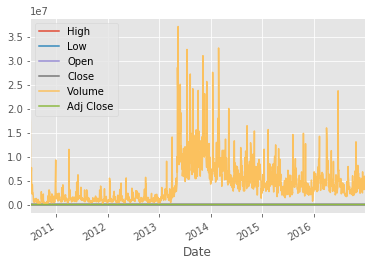

In [27]:
#get Data from web.DataReader
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader('TSLA', 'yahoo', start,end)
print(df.tail(6))
print(df.head(6))

df.plot()
plt.show()

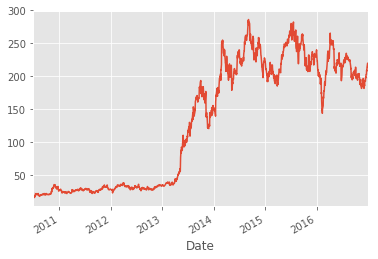

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Adj Close, dtype: float64
                 Open   High
Date                        
2010-06-29  19.000000  25.00
2010-06-30  25.790001  30.42
2010-07-01  25.000000  25.92
2010-07-02  23.000000  23.10
2010-07-06  20.000000  20.00


In [33]:
#plot DataFrame
df['Adj Close'].plot()
plt.show()
print(df['Adj Close'].head())
print(df[['Open','High']].head())

             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


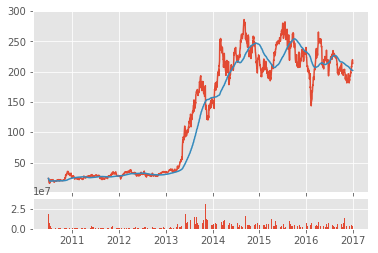

In [71]:
#Calculate SMA, plot Adj Close, 100sma, Volume for Visualization
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

df=pd.read_csv('C:/Users/malco/ tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.head())
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

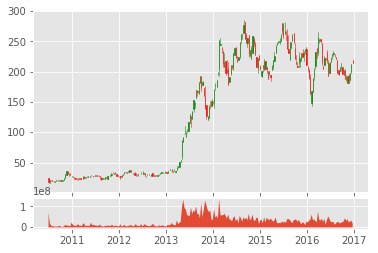

In [77]:
# plot using mpl_finance.candlestick_ohlc
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df=pd.read_csv('C:/Users/malco/ tsla.csv', parse_dates = True, index_col = 0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum() 

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()
#Note width for script in pythonprogramming.net width = 5
candlestick_ohlc(ax1, df_ohlc.values, width =2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

None


In [1]:
#Get list of S&P500 companies and save all sp500 ticker as pickle file using web.DataReader
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    
    with open('sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    
    print(tickers)
    
    return tickers
print(save_sp500_tickers())

def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open ('sp500tickers.pickle', 'rb') as f:
                tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2010,1,1)
    end = dt.datetime.now()
    for ticker in tickers:
        print(tickers)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have{}'.format(ticker))
get_data_from_yahoo()        

['MMM\n', 'ABT\n', 'ABBV\n', 'ABMD\n', 'ACN\n', 'ATVI\n', 'ADBE\n', 'AMD\n', 'AAP\n', 'AES\n', 'AMG\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALXN\n', 'ALGN\n', 'ALLE\n', 'AGN\n', 'ADS\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'ANTM\n', 'AON\n', 'AOS\n', 'APA\n', 'AIV\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ADM\n', 'ARNC\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'ATO\n', 'T\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'BHGE\n', 'BLL\n', 'BAC\n', 'BK\n', 'BAX\n', 'BBT\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIIB\n', 'BLK\n', 'HRB\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BF.B\n', 'CHRW\n', 'COG\n', 'CDNS\n', 'CPB\n', 'COF\n', 'CPRI\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CBS\n', 'CE\n', 'CELG\n', 'CNC\n', 'CNP\n', 'CTL\n', 'CERN\n', 'CF\n', 'SCHW\n', 'CHTR\n', 'CVX\n',

In [9]:
#Combining all S&P500 into 1 df
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

def compile_data():
    with open ('sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace = True)
        
        df.rename(columns = {'Adj Close': ticker}, inplace= True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace = True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df,how = 'outer')
            
        if count %10 == 0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2009-12-31  65.521553  18.364670   NaN  8.73  33.964603  10.102340  36.779999   
2010-01-04  65.798973  18.524536   NaN  8.74  34.431107  10.275106  37.090000   
2010-01-05  65.386833  18.374878   NaN  8.53  34.643883  10.293294  37.700001   
2010-01-06  66.314133  18.476921   NaN  8.40  35.012188  10.238736  37.619999   
2010-01-07  66.361694  18.629986   NaN  8.40  34.979450   9.993223  36.889999   

             AMD        AAP        AES  ...       WLTW       WYNN        XEL  \
Date                                    ...                                    
2009-12-31  9.68  39.562489  10.824719  ...  62.479908  42.420834  14.996179   

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.920529  0.928487  0.811469  0.963270  0.934592  0.896757   
ABT   0.920529  1.000000  0.914571  0.886312  0.952349  0.876058  0.937598   
ABBV  0.928487  0.914571  1.000000  0.889650  0.937262  0.911706  0.928342   
ABMD  0.811469  0.886312  0.889650  1.000000  0.908317  0.908955  0.977661   
ACN   0.963270  0.952349  0.937262  0.908317  1.000000  0.956043  0.953904   

           AMD       AAP       AES  ...      WLTW      WYNN       XEL  \
MMM   0.519971  0.711154  0.489569  ...  0.954885  0.429866  0.965150   
ABT   0.563790  0.718103  0.657161  ...  0.929578  0.444436  0.923351   
ABBV  0.753520  0.208310  0.361584  ...  0.929827  0.213173  0.857456   
ABMD  0.778407  0.510265  0.584019  ...  0.847600  0.298442  0.845605   
ACN   0.602643  0.698425  0.530175  ...  0.955332  0.376241  0.971433   

           XRX      XLNX       XYL       YUM       ZBH      ZION       ZTS  
MMM   0.596341 

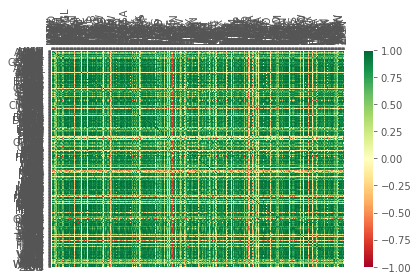

In [2]:
# plot heatmap correlation table of all S&P500 Stocks
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pickle
import requests

style.use('ggplot')

def visualize_data():
    df = pd.read_csv('C:/Users/malco/sp500_joined_closes.csv')    
    df_corr = df.corr()
    print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap =plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor = False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    plt.show()
    
    
visualize_data()
plt.show()

In [11]:
# part 9 preprocessing data
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('C:/Users/malco/sp500_joined_closes.csv', index_col = 0)
    tickers = df.columns.values
    df.fillna(0, inplace = True)
#     print(tickers)
    for i in range(1, hm_days+1):
#         print(i)
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    
    df.fillna(0, inplace = True)
    return tickers, df

process_data_for_labels('XOM')
    

(array(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
        'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
        'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL',
        'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT',
        'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS',
        'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM',
        'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO',
        'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX',
        'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP',
        'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF-B', 'CHRW', 'COG', 'CDNS',
        'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE',
        'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW',
        'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS',
        'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 

In [12]:
# Create ML target function
def buy_hold_sell(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < requirement:
            return -1
        return 0

    def extract_featuresets(ticker):
    tickers, process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map[buy_sell_hold,
                                             df['{}_1d'.format(ticker)],
                                             df['{}_2d'.format(ticker)],
                                             df['{}_3d'.format(ticker)],
                                             df['{}_4d'.format(ticker)],
                                             df['{}_5d'.format(ticker)],
                                             df['{}_6d'.format(ticker)],
                                             df['{}_7d'.format(ticker)]])
    vals = df['{}_target'.format(ticker)].values.to_list()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    df.fillna(0, inplace = True)
    df = df.replace([-np.inf, np.inf], np.nan)
    df.dropna(inplace = True)
                                              
    df_vals = df[[ticker for ticker in tickers]].pct_change()                                          
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace= True)
                                              
    X = df_vals.values
    Y = df['{}_target'.format(ticker)].values
                                              
    return X, y, df                                          
                                              
extract_featuresets('XOM')                                              